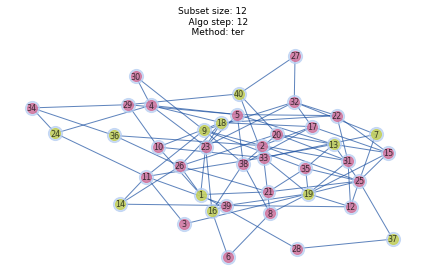

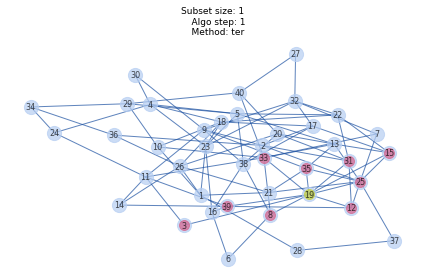

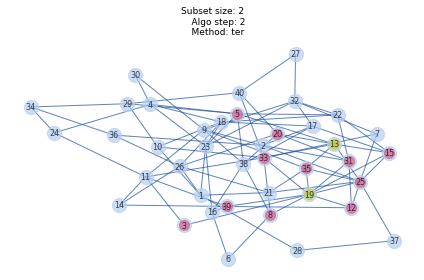

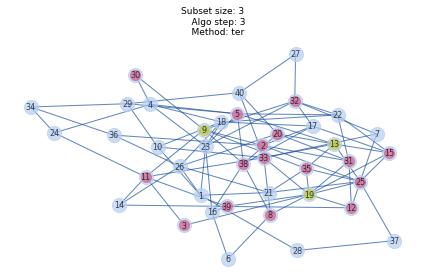

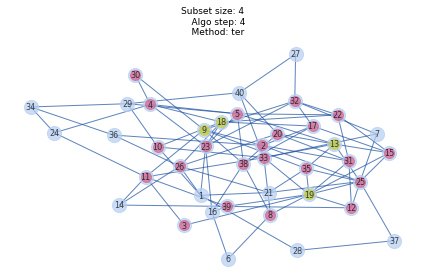

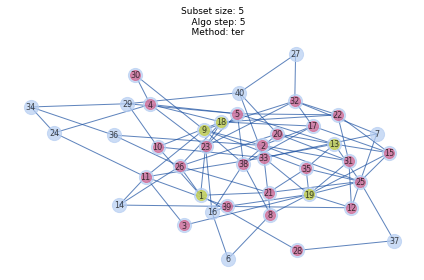

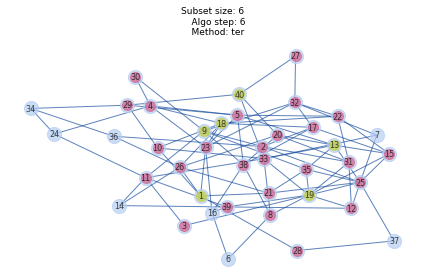

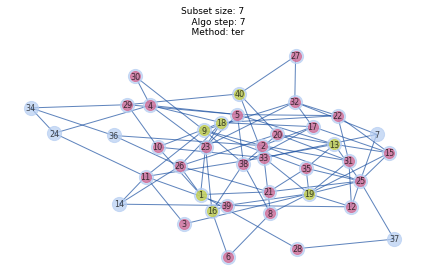

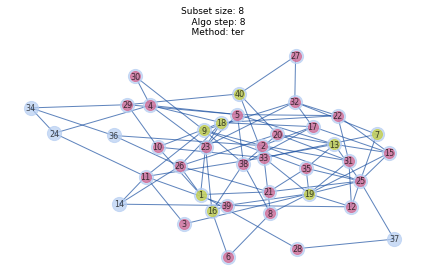

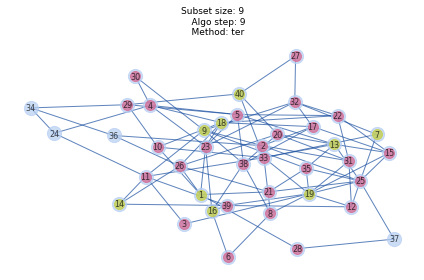

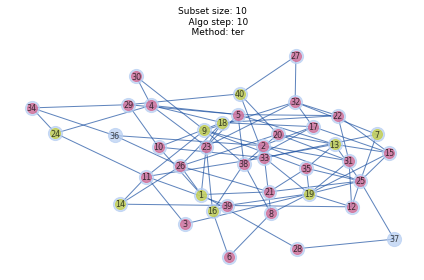

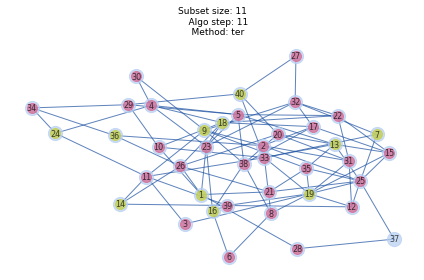

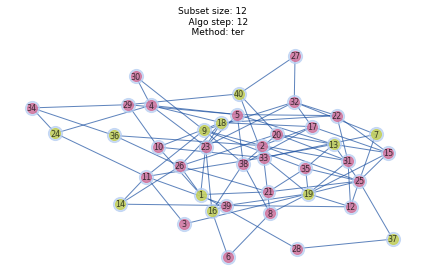

In [1]:
"""
   greedy algorithm to try to find a minimal dominating set
"""
%matplotlib inline
import importlib
import pylab as pl
from IPython import display
import time
import pickle
import os
from plot_graph import plot_graph_notebook
from read_params import read_params
importlib.reload(plot_graph_notebook)


def process_graph(graph_name):
    # load graph data
    with open(f"data/{graph_name}_neighbors", "rb") as f:
        neighbors = pickle.load(f)

    with open(f"data/{graph_name}_edges", "rb") as f:
        edges_list = pickle.load(f)

    # clean folder
    dir_name = f"images/{graph_name}"
    for filename in os.listdir(dir_name):
        if "initial" not in filename and "ter" in filename:
            path_to_file = os.path.join(dir_name, filename)
            os.remove(path_to_file)

    # print(neighbors)
    # size of the graph (number of nodes)
    nodes = neighbors.keys()
    n_nodes = len(nodes)

    """
        sort the nodes by degree
        aka the number of neighbors
        """
    sorted_nodes = sorted(neighbors,
                          key=lambda node: len(neighbors[node]),
                          reverse=True)

    """
        greedy algorithm
    """

    print('\n======')
    print('greedy algorithm')
    print('======')

    selected_nodes = list()
    dominated_nodes = list()
    step = 0

    def get_next_node(dominated_nodes, nodes):
        """
            function used to select a new node in the algorithm
            
            EDIT THIS FUNCTION
        """
        # built the reduced graph
        # consisting in the original graph deprived from dominated nodes
        reduced_graph = [node for node in nodes if node not in dominated_nodes]

        # build a new dictionary containing adjecency relations in that graph
        # we need to edit the dictionary of neighbors first.
        neighbors_reduced=neighbors.copy()
        """
            ADD LINES HERE
        """

        neighbors_in_reduced_graph={node:neighbors_reduced[node] for node in
                                    reduced_graph}

        # sort that dictionary as before
        sorted_nodes_reduced = sorted(neighbors_in_reduced_graph,
                              key=lambda node: len(neighbors_in_reduced_graph[node]),
                              reverse=True)
        return sorted_nodes_reduced[0]

    while len(dominated_nodes) < n_nodes:
        selected_node = get_next_node(dominated_nodes, nodes)
        print(selected_nodes)

        # update graph
        selected_nodes.append(selected_node)
        print(f"\nadd {selected_node} to the dominating set")
        # update the list of dominated nodes
        dominated_nodes.append(selected_node)
        print(f"add {selected_node} to the list of dominated nodes")
        # print('neighbors : ')
        for neighbor in neighbors[selected_node]:
            if neighbor not in dominated_nodes:
                # update the list of not dominated nodes
                dominated_nodes.append(neighbor)
                print(f"add {neighbor} to the list of dominated nodes")
        # see how many more nodes we have to dominate
        print(
            f"still have to dominate {n_nodes-len(dominated_nodes)} nodes")
        step += 1
        plot_graph_notebook.plot_subset(step,
                            sorted_nodes,
                            edges_list,
                            dominated_nodes,
                            selected_nodes,
                            graph_name,
                            method="ter")
        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.3)
                


process_graph("exercise")

# params=read_params()
# n_nodes =params[0]
# max_successors = params[1]
# parameters = f"n={n_nodes}_maxs={max_successors}"
# process_graph(parameters)

# process_graph("custom")
